## Visualizing Cosine Similarity Scores

In [1]:
import os
import pandas as pd
import json
directory = 'cosinedata'


def combine_csv(directory):
    all_data = pd.DataFrame()  
    
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            print(f'Rows in df file: {len(df)}')
            all_data = pd.concat([all_data, df], ignore_index=True)
    
    print(f'Final Number of rows: {len(all_data)}')
    return all_data

all_csv = combine_csv(directory)


Rows in df file: 5547
Rows in df file: 330
Rows in df file: 1315
Rows in df file: 1434
Rows in df file: 6474
Rows in df file: 1242
Rows in df file: 426
Rows in df file: 1130
Final Number of rows: 17898


In [6]:
#before filtering
#"C:\Users\ashle\OneDrive\School\CS315_Project2\CS315Project2-main\raw_tiktokData\pyktok_data - Copy"
directory2 = "raw_tiktokData/pyktok_data"


def lookat(directory):
    all_data = pd.DataFrame()  
    
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            print(f'Rows in df file: {len(df)}')
            all_data = pd.concat([all_data, df], ignore_index=True)
    
    print(f'Final Number of rows: {len(all_data)}')
    return all_data

old_data = lookat(directory2) #65.93, 

Rows in df file: 588
Rows in df file: 1747
Rows in df file: 1727
Rows in df file: 3095
Rows in df file: 1746
Rows in df file: 1853
Rows in df file: 482
Rows in df file: 15424
Rows in df file: 9009
Rows in df file: 9381
Rows in df file: 8007
Rows in df file: 1894
Rows in df file: 147
Rows in df file: 9224


ParserError: Error tokenizing data. C error: Expected 20 fields in line 841, saw 22


In [7]:
metrics_df = pd.DataFrame()  
metrics_df["Person_all"] = [4]
metrics_df["Total Number of Videos"] = [17299] 
metrics_df["Total Number of Filtered Videos"] = [12351] 
metrics_df

,Person_all,Total Number of Videos,Total Number of Filtered Videos
0,4,17299,12351


In [8]:
#all_csv.drop(columns=['headline_genre'], inplace=True)
all_csv.head()
unique_values = all_csv['headline_type'].unique()
print(unique_values)

['OpEd' 'Styles' 'Science' 'Business' 'Arts&Leisure' 'Smarter Living' nan
 'Metropolitan' 'Weekend' 'Foreign' 'Culture' 'Washington' 'Summary'
 'BookReview' 'Express' 'Politics' 'National' 'NYTNow' 'SundayBusiness'
 'Climate' 'Travel' 'Insider' 'Metro' 'RealEstate' 'Learning' 'Dining'
 'Editorial' 'Games' 'Headway' 'TStyle' 'Obits' 'Podcasts' 'Magazine'
 'Health' 'Well' 'Briefing' 'Books' 'Real Estate' 'Letters' 'Arts' 'Food'
 'The Upshot' 'Projects and Initiatives' 'Opinion' 'SpecialSections'
 'U.S.' 'Movies' 'Investigative' 'Sports' 'The Learning Network' 'World'
 'Business Day' 'Local Investigations' 'Upshot' 'Style' 'Weather' 'Video'
 'T Magazine' 'en Español' 'Corrections' 'Universal' 'Graphics' 'None'
 'Technology' 'Crosswords & Games' 'New York' 'Photo']


NameError: name 'plt' is not defined

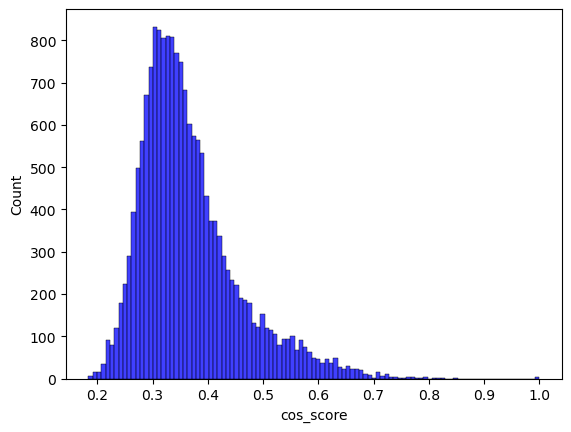

In [16]:
import seaborn as sns

sns.histplot(data=all_csv, x='cos_score', kde=False, color='blue', edgecolor='black')
plt.xlabel('Cosine Scores')
plt.ylabel('Number of Videos')
plt.title('Histogram of Cosine Scores')
plt.xlim(0, 1)
plt.show()

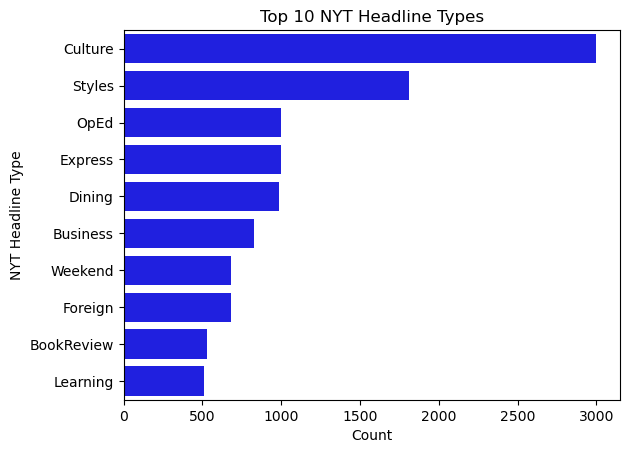

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

headline_type_counts = all_csv['headline_type'].value_counts()
top_10_headline_types = headline_type_counts.head(10)

sns.barplot(x=top_10_headline_types.values, y=top_10_headline_types.index, color='blue')

plt.xlabel('Count')
plt.ylabel('NYT Headline Type')
plt.title('Top 10 NYT Headline Types')

plt.tick_params(axis='y', labelsize=10)
plt.show()

In [28]:
selected_types = ['Foreign', 'Business', 'Washington', 'National', 'Express']
headline_type_counts = all_csv[all_csv['headline_type'].isin(selected_types)]['headline_type'].value_counts()

print(headline_type_counts)
headline_count = headline_type_counts.sum()
all_count = all_csv['headline_type'].value_counts().sum()
print(headline_count)
print(all_count)
print(headline_count/all_count)

Express       998
Business      827
Foreign       680
National      345
Washington    207
Name: headline_type, dtype: int64
3057
17319
0.17651134592066517


In [12]:
#"C:\Users\ashle\OneDrive\School\CS315_Project2\CS315Project2-main\allDetailsNYT.json"
json_file_path = "allDetailsNYT.json"

all_News = []  
with open(json_file_path, 'r') as file:
    data = json.load(file)
    for year in data:
        year_types = []
        for month in data[year]:
            article_type = data[year][month].get('news_desk', '')
            if article_type:  
                year_types.append(article_type)
        all_News += year_types  # Concatenate year_types to all_News
concatenated_list = [item for sublist in all_News for item in sublist]
print(len(concatenated_list))

106125


List of news types in Tiktok data: ['OpEd' 'Styles' 'Science' 'Business' 'Arts&Leisure' 'Smarter Living' nan
 'Metropolitan' 'Weekend' 'Foreign' 'Culture' 'Washington' 'Summary'
 'BookReview' 'Express' 'Politics' 'National' 'NYTNow' 'SundayBusiness'
 'Climate' 'Travel' 'Insider' 'Metro' 'RealEstate' 'Learning' 'Dining'
 'Editorial' 'Games' 'Headway' 'TStyle' 'Obits' 'Podcasts' 'Magazine'
 'Health' 'Well' 'Briefing' 'Books' 'Real Estate' 'Letters' 'Arts' 'Food'
 'The Upshot' 'Projects and Initiatives' 'Opinion' 'SpecialSections'
 'U.S.' 'Movies' 'Investigative' 'Sports' 'The Learning Network' 'World'
 'Business Day' 'Local Investigations' 'Upshot' 'Style' 'Weather' 'Video'
 'T Magazine' 'en Español' 'Corrections' 'Universal' 'Graphics' 'None'
 'Technology' 'Crosswords & Games' 'New York' 'Photo']
List of news types in all NYT data: ['Sports' 'Business' 'Express' 'Games' 'Metro' 'Summary' 'Corrections'
 'Foreign' 'RealEstate' 'SundayBusiness' 'National' 'Styles' 'Washington'
 'SpecialSec

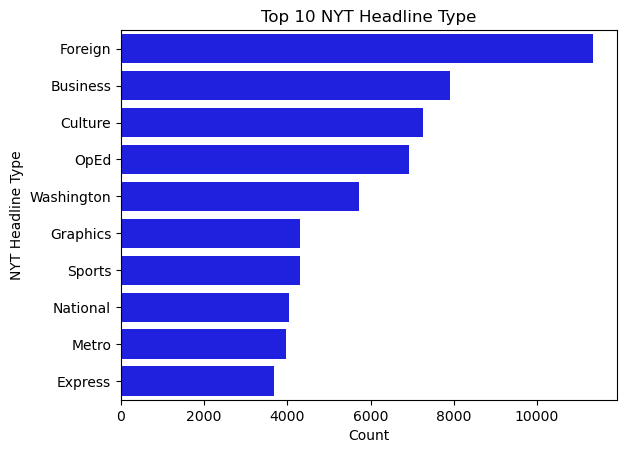

In [18]:
df = pd.DataFrame() 
df["all_types"] = concatenated_list

unique_values = all_csv['headline_type'].unique()
print(f'List of news types in Tiktok data: {unique_values}')

df['all_types'] = df['all_types'].replace('', pd.NA)
df.dropna(subset=['all_types'], inplace=True)
print(f'List of news types in all NYT data: {df["all_types"].unique()}')


headline_type_counts = df['all_types'].value_counts()
top_10_headline_types = headline_type_counts.head(10)

sns.barplot(x=top_10_headline_types.values, y=top_10_headline_types.index, color='blue')

plt.xlabel('Count')
plt.ylabel('NYT Headline Type')
plt.title('Top 10 NYT Headline Type')

plt.tick_params(axis='y', labelsize=10)
plt.show()


In [27]:
# Assuming 'all_types' is the column containing the types, and 'df' is your DataFrame
# Filter the DataFrame for the specified types and then use value_counts() on the 'all_types' column

selected_types = ['Foreign', 'Business', 'Washington', 'National', 'Express']
headline_type_counts = df[df['all_types'].isin(selected_types)]['all_types'].value_counts()

print(headline_type_counts)
headline_count = headline_type_counts.sum()
all_count = df['all_types'].value_counts().sum()
print(headline_count)
print(all_count)
print(headline_count/all_count)

Foreign       11353
Business       7921
Washington     5714
National       4043
Express        3676
Name: all_types, dtype: int64
32707
104205
0.31387169521616043


In [37]:
from scipy.stats import t
newsVideo, allVid = 3057, 17319
newsAll, allNYT = 32707, 104205

# Calculate the sample proportions
p1 = newsVideo / allVid
p2 = newsAll / allNYT

# Calculate the pooled proportion
pooled_p = (newsVideo + newsAll) / (allVid + allNYT)

# Calculate the standard error
se = (pooled_p * (1 - pooled_p) * (1 / allVid + 1 / allNYT)) ** 0.5

# Calculate the t-statistic
t_statistic = (p1 - p2) / se

df = min(allVid - 1, allNYT - 1)

# Calculate the two-tailed p-value
p_value = t.sf(abs(t_statistic), df) * 2  

print(f"P-value: {p_value}")

P-value: 1.725898044935144e-284
